In [1]:
import cv2

In [2]:
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [3]:
import tensorflow as tf

tf.__version__

'2.8.2'

In [4]:
pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.4 MB/s 


In [ ]:
from skimage.io import imread

from keras.applications.imagenet_utils import decode_predictions
from efficientnet import EfficientNetB0, EfficientNetB3
from efficientnet import center_crop_and_resize, preprocess_input

import os

In [ ]:
#텐서플로우에서 고양이와 강아지 사진을 불러옴
data_train,ds_info=tfds.load('cats_vs_dogs',split=[tfds.Split.TRAIN],with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteTXX6GT/cats_vs_dogs-train.tfrecord*...:   0%|    …

Dataset cats_vs_dogs downloaded and prepared to ~/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
ds_info#정보확인

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and

In [ ]:
#이미지를 100개 가지고와보기
images=[one['image'].numpy() for one in data_train[0].take(100)]
len(images)

100

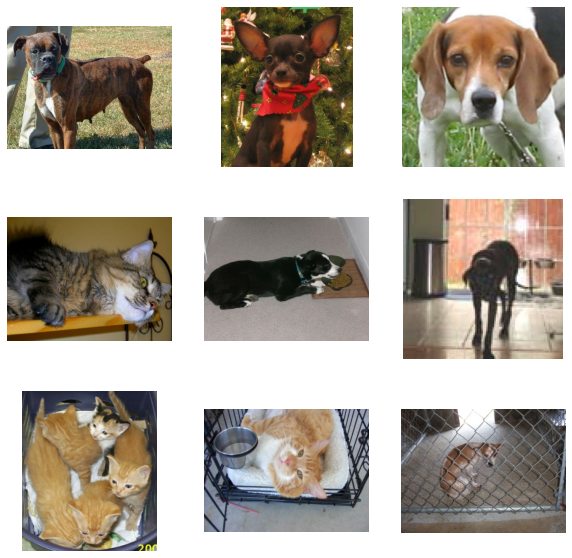

In [ ]:
#시각화
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(images[i])
  plt.axis('off')

In [ ]:
#이미지를 30개 가지고와보기
images=[one['image'].numpy() for one in data_train[0].take(10)]
len(images)

SyntaxError: ignored

# 모델만들어 보기

In [ ]:
#텐서플로우에 이미 이미지가 학습되어진 모델이 이 resenet50이라고 있다.
resnet50_pre=tf.keras.applications.resnet.ResNet50(weights='imagenet',input_shape=(224,224,3))
resnet50_pre.summary()

In [ ]:
model=tf.keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(2,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics='accuracy')

In [ ]:
#모델을 통해 고양이와 강아지의 데이터를 테스트를 해보는 코드 작성
#예측결과를 수로 바꿔주는 라이브러리
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [ ]:
def pred_img(img):
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_resized=cv2.resize(img,(224,224))#모델에 들어가는 이미지 크기가 224*224 이기때문에 224*244로 이미지 크기를 조정해줌
  pred=resnet50_pre.predict(img_resized.reshape([1,224,224,3]))#예측을 할건데 모델.predict(위에서 이미지 크기를 조정한 이미지를 넣고 reshape()로 재배치를 시킨 값을 넣는다.)
  decoded_pred=decode_predictions(pred)#예측결과를 어떤 대상인지로 바꿔주는 것

  #예측 퍼센트 결과들을 1위부터 5위까지 순위로 출력함
  for i,instance in enumerate(decoded_pred[0]):
    print('{}위 : {} ({:.2f})'.format(i+1,instance[1],instance[2]*100))


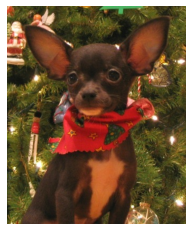

49152/35363 [=========================================] - 0s 0us/step
1위 : Chihuahua (90.09)
2위 : miniature_pinscher (4.65)
3위 : French_bulldog (2.58)
4위 : Boston_bull (0.80)
5위 : boxer (0.45)


In [ ]:
pred_img(images[1])